In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
import numpy as np
from scipy.special import erfc

class Burgers:
    ''' Class to generate analytical solutions of Burgers equation from delta peak. 
    
    Good source: https://www.iist.ac.in/sites/default/files/people/IN08026/Burgers_equation_viscous.pdf'''
    def __init__(self, viscosity, A):
        self.v = viscosity
        self.A = A
    
    
    def solution(self, x, t):
        return self.u(x, t, self.v, self.A)
    
    def library(self, x, t):
        u = self.u(x, t, self.v, self.A)
        u_t = self.u_t(x, t, self.v, self.A)
        u_x = self.u_x(x, t, self.v, self.A)
        u_xx = self.u_xx(x, t, self.v, self.A)
        u_xxx = self.u_xxx(x, t, self.v, self.A)
  
        derivs = np.concatenate([np.ones_like(u), u_x, u_xx, u_xxx], axis=1)
        theta = np.concatenate([derivs, u * derivs, u**2 * derivs], axis=1)

        return u_t, theta
    
    @staticmethod
    def u(x, t, v, A):
        R = A/(2*v)
        z = x/np.sqrt(4*v*t)
        
        solution = np.sqrt(v/t) * ((np.exp(R) - 1) * np.exp(-z**2)) / (np.sqrt(np.pi) + (np.exp(R) - 1)*np.sqrt(np.pi/2)*erfc(z))
        return solution
    
    @staticmethod
    def u_x(x, t, v, A):
        R = A/(2*v)
        z = x/np.sqrt(4*v*t)
        
        u = Burgers.u(x, t, v, A)
        u_x = 1/np.sqrt(4*v*t) * (np.sqrt(2*t/v)*u**2-2*z*u)
        return u_x
    
    @staticmethod
    def u_xx(x, t, v, A):
        R = A/(2*v)
        z = x/np.sqrt(4*v*t)
        
        u = Burgers.u(x, t, v, A)
        u_x = Burgers.u_x(x, t, v, A)
        u_xx = 1/np.sqrt(4*v*t) * (-2*u/np.sqrt(4*v*t) - 2*z*u_x + 2*np.sqrt(2*t/v)*u*u_x) # could be written shorter, but then get NaNs due to inversions
        return u_xx
    
    @staticmethod
    def u_xxx(x, t, v, A):
        R = A/(2*v)
        z = x/np.sqrt(4*v*t)
        
        u = Burgers.u(x, t, v, A)
        u_x = Burgers.u_x(x, t, v, A)
        u_xx = Burgers.u_xx(x, t, v, A)
        u_xxx = 1/np.sqrt(4*v*t) * (-4/np.sqrt(4*v*t) * u_x + 2 *np.sqrt(2*t/v)*u_x**2 + u_xx*(-2*z+2*np.sqrt(2*t/v)*u)) # could be written shorter, but then get NaNs due to inversions
        return u_xxx
    
    @staticmethod
    def u_t(x, t, v, A):
        R = A/(2*v)
        z = x/np.sqrt(4*v*t)
        
        u = Burgers.u(x, t, v, A)
        u_x = Burgers.u_x(x, t, v, A)
        u_xx = 1/np.sqrt(4*v*t) * (-2*u/np.sqrt(4*v*t) - 2*z*u_x + 2*np.sqrt(2*t/v)*u*u_x)
        u_t = v * u_xx - u *u_x
        return u_t

In [2]:
from DeePyMoD_SBL.data import Burgers

In [3]:
x = np.linspace(-1, 1, 1000)
t = np.linspace(1e-4, 5, 1000)

x_grid, t_grid = np.meshgrid(x, t, indexing='ij')

A = 1
viscosity = 0.1

In [4]:
burgers = Burgers(viscosity, A)

In [5]:
sol = burgers.solution(x_grid, t_grid)

In [6]:
sol.shape

(1000, 1000)

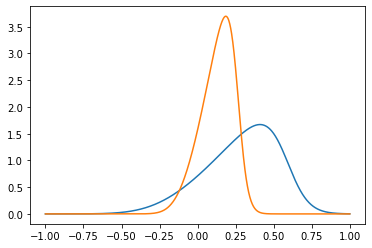

In [7]:
plt.plot(x, sol[:, 49])
plt.plot(x, sol[:, 10])

In [8]:
sol_x = burgers.u_x(x_grid, t_grid, viscosity, A)

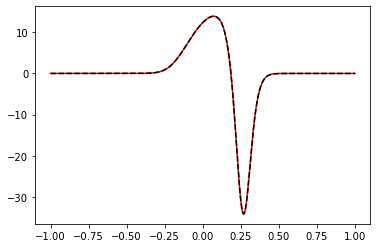

In [9]:
frame = 10
plt.plot(x, sol_x[:, frame], 'r')
plt.plot(x, np.gradient(sol[:, frame], x), 'k--')

In [10]:
(sol_x - np.gradient(sol, x, axis=0))[1:-1]

array([[ 0.00000000e+000, -2.73045876e-209, -1.60116608e-105, ...,
         1.10510381e-009,  1.11929788e-009,  1.13340395e-009],
       [ 0.00000000e+000, -1.91565826e-208, -4.27012578e-105, ...,
         1.17088478e-009,  1.18490225e-009,  1.19882471e-009],
       [ 0.00000000e+000, -1.33872359e-207, -1.13652481e-104, ...,
         1.23661123e-009,  1.25043893e-009,  1.26418760e-009],
       ...,
       [ 0.00000000e+000,  1.98684197e-205,  1.68675237e-102, ...,
         9.89531440e-008,  9.86491637e-008,  9.83465989e-008],
       [ 0.00000000e+000,  2.84308894e-206,  6.33742857e-103, ...,
         9.93803453e-008,  9.90748435e-008,  9.87706073e-008],
       [ 0.00000000e+000,  4.05236011e-207,  2.37634116e-103, ...,
         9.98097245e-008,  9.95025789e-008,  9.91967034e-008]])

In [11]:
sol_xx = burgers.u_xx(x_grid, t_grid, viscosity, A)

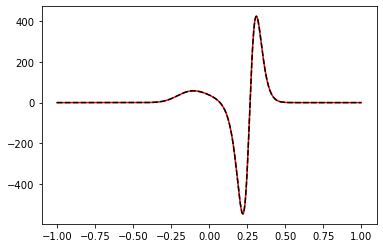

In [12]:
frame = 10
plt.plot(x, sol_xx[:, frame], 'r')
plt.plot(x, np.gradient(sol_x[:, frame], x), 'k--')

In [13]:
sol_xxx = burgers.u_xxx(x_grid, t_grid, viscosity, A)

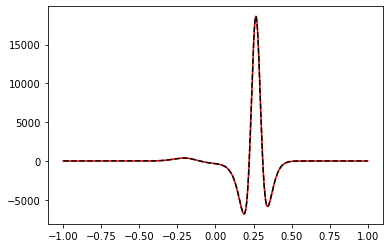

In [14]:
frame = 10
plt.plot(x, sol_xxx[:, frame], 'r')
plt.plot(x, np.gradient(sol_xx[:, frame], x), 'k--')

In [15]:
sol_t = burgers.u_t(x_grid, t_grid, viscosity, A)

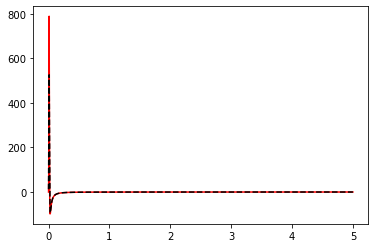

In [16]:
x_slice = 566
plt.plot(t, sol_t[x_slice, :], 'r')
plt.plot(t, np.gradient(sol[x_slice, :], t), 'k--')

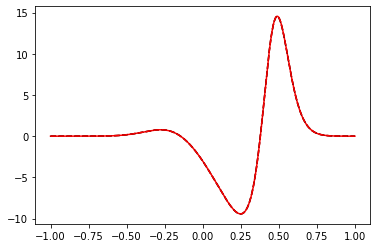

In [17]:
frame = 30
plt.plot(x, sol_t[:, frame], 'r')
plt.plot(x, np.gradient(sol, t, axis=1)[:, frame], 'k--')
plt.plot(x, (viscosity * sol_xx - sol * sol_x)[:, frame], 'r--')

In [18]:
viscosity * sol_xx - sol * sol_xx

array([[0.00000000e+000, 4.91035732e-208, 1.73526979e-103, ...,
        2.50448857e-003, 2.50021430e-003, 2.49595252e-003],
       [0.00000000e+000, 3.46824216e-207, 4.64728903e-103, ...,
        2.49577350e-003, 2.49151561e-003, 2.48727018e-003],
       [0.00000000e+000, 2.44004220e-206, 1.24213263e-102, ...,
        2.48703734e-003, 2.48279591e-003, 2.47856690e-003],
       ...,
       [0.00000000e+000, 3.62134371e-204, 1.84348827e-100, ...,
        6.08997134e-003, 6.05980836e-003, 6.02981159e-003],
       [0.00000000e+000, 5.14732776e-205, 6.89718846e-101, ...,
        6.15607871e-003, 6.12563439e-003, 6.09535776e-003],
       [0.00000000e+000, 7.28761642e-206, 2.57536871e-101, ...,
        6.22259297e-003, 6.19186549e-003, 6.16130720e-003]])

In [19]:
np.allclose(sol_t[1:-1, 1:-1], np.gradient(sol, t, axis=1)[1:-1, 1:-1], atol=1e-5)

False

In [20]:
np.argmax(np.abs(sol_t[4:-4, 4:-4] - np.gradient(sol, t, axis=1)[4:-4, 4:-4]))

561472

In [21]:
np.unravel_index(23772, sol_t[4:-4, 4:-4].shape)

(23, 956)

In [22]:
from DeePyMoD_SBL.data import Burgers